**Проектная работа по модулю “Математика и статистика в Python”**

**0. Подключение библиотек**

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

**1. Загрузить файл hr.csv.**

In [2]:
#satisfaction_level - уровень удовлетворенности
#last_evaluation - последняя оценка
#number_project - количество проектов
#average_montly_hours - среднее количество отработанных часов за месяц
#time_spend_company - время проведенное в компании
#Work_accident - наличие инцидентов на работе
#left - уволился?
#promotion_last_5years - было повышение за последние 5 лет
#sales - характер работы
#salary - уровень зарплаты

In [3]:
data = pd.read_csv('hr.csv')
data[:7]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
moda = data.mode()
moda[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [7]:
print(f'Медиана - satisfaction_level: {statistics.median(data.satisfaction_level)}')
print(f'Медиана - last_evaluation: {statistics.median(data.last_evaluation)}')
print(f'Медиана - number_project: {statistics.median(data.number_project)}')
print(f'Медиана - average_montly_hours: {statistics.median(data.average_montly_hours)}')
print(f'Медиана - time_spend_company: {statistics.median(data.time_spend_company)}')
print(f'Медиана - Work_accident: {statistics.median(data.Work_accident)}')
print(f'Медиана - left: {statistics.median(data.left)}')
print(f'Медиана - promotion_last_5years: {statistics.median(data.promotion_last_5years)}')
print(f'Медиана - sales: {statistics.median(data.sales)}')
print(f'Медиана - salary: {statistics.median(data.salary)}')

Медиана - satisfaction_level: 0.64
Медиана - last_evaluation: 0.72
Медиана - number_project: 4
Медиана - average_montly_hours: 200
Медиана - time_spend_company: 3
Медиана - Work_accident: 0
Медиана - left: 0
Медиана - promotion_last_5years: 0
Медиана - sales: sales
Медиана - salary: low


**3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

In [8]:
# замена категориальных данных на числовые значения
print(data.sales.unique())
# sales - 0, accounting - 1, hr - 2, technical - 3,
# support - 4, management - 5, IT - 6, product_mng - 7,
# marketing - 8, RandD - 9
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [9]:
data_itog = data.copy()

def encode_kow(row):
    if row == 'sales':
        return 0
    elif row == 'accounting':
        return 1
    elif row == 'hr':
        return 2
    elif row == 'technical':
        return 3
    elif row == 'support':
        return 4
    elif row == 'management':
        return 5
    elif row == 'IT':
        return 6
    elif row == 'product_mng':
        return 7
    elif row == 'marketing':
        return 8
    return 9
data_itog['kind_of_work'] = data_itog['sales'].apply(encode_kow)

def encode_salary_level(row):
    if row == 'low':
        return 0
    elif row == 'medium':
        return 1
    return 2

data_itog['salary_level'] = data_itog['salary'].apply(encode_salary_level)
data_itog.drop(['sales', 'salary'], axis=1, inplace=True)
data_itog.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,kind_of_work,salary_level
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [40]:
data_itog.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,kind_of_work,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [10]:
corr_matrix = data_itog.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,kind_of_work,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
kind_of_work,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


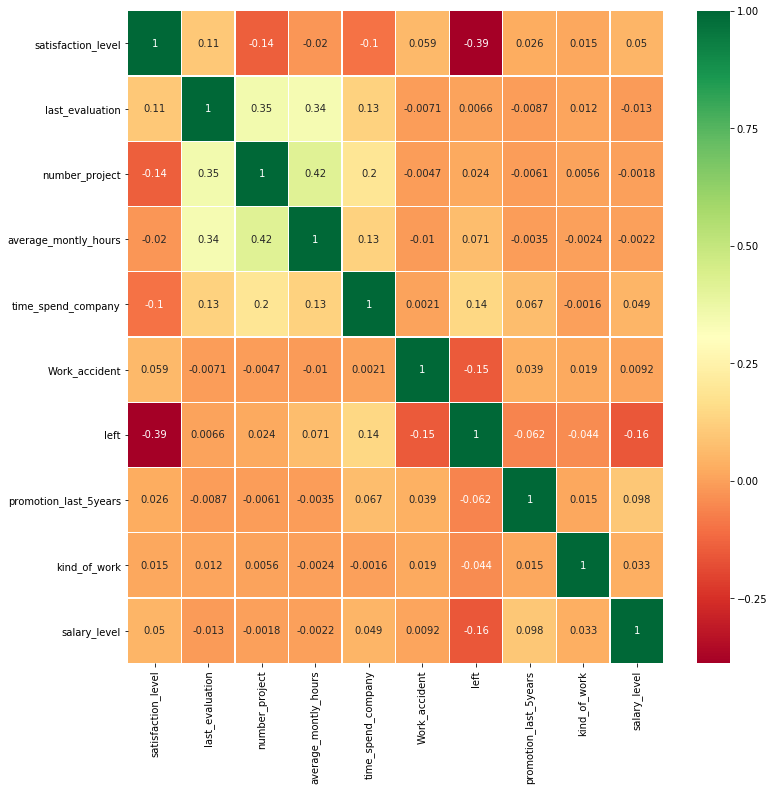

In [11]:
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [12]:
# наибольшая корреляция наблюдается между количеством проектов, в которых участвует сотрудник,
# со средним количеством отработанных часов, что логично.
# наибольшая обратная корреляция между уровнем удовлетворённости и фактом увольнения -
# чем больше недоволен сотрудник, тем вероятнее он уволится

**4. Визуализировать несколько взаимосвязей между переменными.**

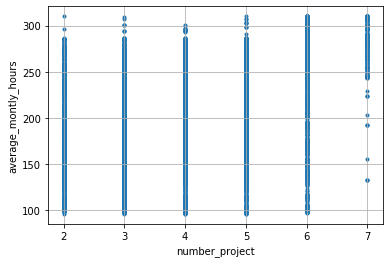

In [13]:
# визуализация взаимосвязи между наиболее коррелирующими атрибутами
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.grid(True)
plt.scatter(data.number_project, data.average_montly_hours, marker='.')

In [14]:
# похоже на дискретное равномерное распределение
# из графика можно увидеть, что мало кто может выдержать более 290 часов в месяц,
# но с увеличением проектов всё большему числу сотрудников приходится это делать

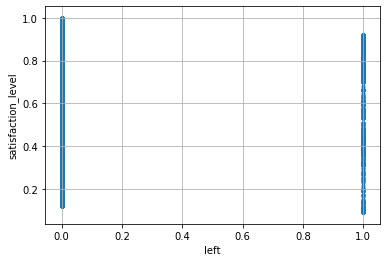

In [15]:
plt.xlabel('left')
plt.ylabel('satisfaction_level')
plt.grid(True)
plt.scatter(data.left, data.satisfaction_level, marker='.')

In [16]:
# похоже на распределение Бернулли
# по графику можно предположить, что уволившиеся сотрудники на последнем анкетировании показали меньшую удовлетворённость

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [17]:
# предположим, что наличие инцидентов на работе не связано с фактом увольнения
data_5_1 = data_itog[data_itog['left'] == 0]['Work_accident']
print(len(data_5_1))
data_5_2 = data_itog[data_itog['left'] == 1]['Work_accident']
print(len(data_5_2))
stats.ttest_ind(data_5_1.sample(n=3571), data_5_2)

11428
3571


Ttest_indResult(statistic=18.421048514107028, pvalue=4.541232755784423e-74)

In [18]:
# отвергаем предположение, имеется связь между фактом увольнения и инцидентами

In [19]:
# предположим, что среднее количество отработанных часов за месяц не связано с фактом повышения на работе
data_5_3 = data_itog[data_itog['promotion_last_5years'] == 0]['average_montly_hours']
print(len(data_5_3))
data_5_4 = data_itog[data_itog['promotion_last_5years'] == 1]['average_montly_hours']
print(len(data_5_4))
stats.ttest_ind(data_5_1.sample(n=319), data_5_4)

14680
319


Ttest_indResult(statistic=-73.98011089785722, pvalue=1.2117486757e-314)

In [20]:
# отвергаем предположение - вероятно, проводящие больше времени на работе чаще получают повышение

**6. Рассчитать сколько работников работает в каждом департаменте.**

In [21]:
# NaN-значений не было, поэтому просто
employees = data[data['left'] == 0]
employees['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

**7.Показать распределение сотрудников по зарплатам.**

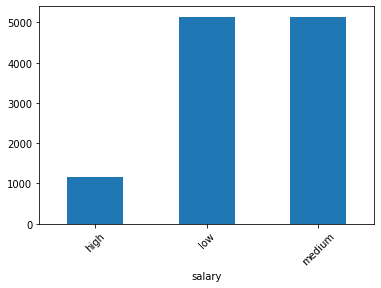

In [22]:
# статистика по текущим работающим сотрудникам
data_salary = employees.groupby(['salary'])['salary'].count()
data_salary.plot(kind='bar', rot=45)

In [41]:
# наибольшую зарплату получает ~10% от всей штатной численности работников, видимо руководители

**8.Показать распределение сотрудников по зарплатам совместно с департаментами.**

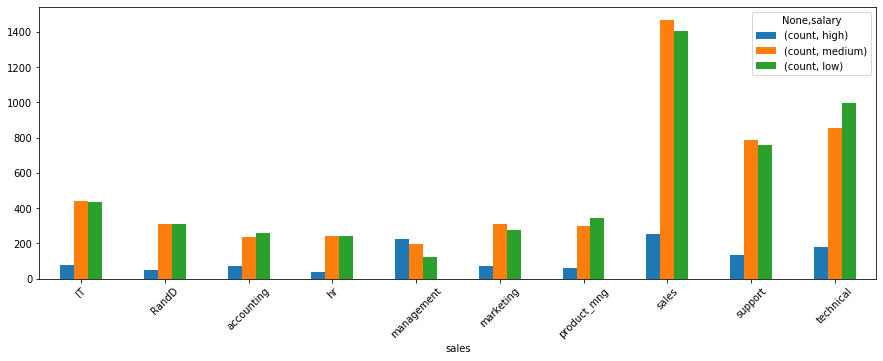

In [24]:
# статистика по текущим работающим сотрудникам
eds = employees.groupby(['sales', 'salary']).count()[['left']]
eds = eds.rename(columns={"left": "count"}).reindex(level=1, index = ['high', 'medium', 'low'])
plt.rcParams["figure.figsize"] = (15,5)
eds.unstack('salary').plot(kind='bar', rot=45)

In [42]:
# больше всего продажников, а далее техников и службы поддержки, которые тянут всю остальную работу с клиентами
# зачем столько hr-специалистов? почти как в бухгалтерии...

**9.Сколько сотрудников покинули компанию.**

In [25]:
len(data[data['left']==1])

3571

**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

In [26]:
# увольнения не связаны с уровнем зарплаты?
data_10_1 = data_itog[data_itog['left'] == 0]['salary_level']
print(f'Размер выборки с уровнем заработной платы текущих сотрудников: {len(data_10_1)}')
data_10_2 = data_itog[data_itog['left'] == 1]['salary_level']
print(f'Размер выборки с уровнем заработной платы уволенных сотрудников: {len(data_10_2)}')
sample_1 = data_10_1.sample(n=30)
sample_2 = data_10_2.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_1), statistics.variance(sample_2))
stats.ttest_ind(sample_1, sample_2)

Размер выборки с уровнем заработной платы текущих сотрудников: 11428
Размер выборки с уровнем заработной платы уволенных сотрудников: 3571
0.25862068965517243 0.3275862068965517


Ttest_indResult(statistic=0.0, pvalue=1.0)

In [27]:
# что говорит о том, что уровень зарплаты напрямую влияет на возможность увольнения сотрудником

In [28]:
# увольнения никак не связаны с местом работы сотрудника?
data_10_3 = data_itog[data_itog['left'] == 0]['kind_of_work']
print(f'Размер выборки с департаментом текущих сотрудников: {len(data_10_3)}')
data_10_4 = data_itog[data_itog['left'] == 1]['kind_of_work']
print(f'Размер выборки с департаментом уволенных сотрудников: {len(data_10_4)}')
sample_3 = data_10_3.sample(n=30)
sample_4 = data_10_4.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_3), statistics.variance(sample_4))
stats.ttest_ind(sample_3, sample_4, equal_var=False)

Размер выборки с департаментом текущих сотрудников: 11428
Размер выборки с департаментом уволенных сотрудников: 3571
9.040229885057473 7.757471264367816


Ttest_indResult(statistic=0.2672795293148138, pvalue=0.7902075854614172)

In [29]:
# т.е. место работы мало влияет на возможность увольнения сотрудником

In [30]:
# увольнения не связаны с фактом повышения по службе?
data_10_5 = data_itog[data_itog['left'] == 0]['promotion_last_5years']
print(f'Размер выборки с департаментом текущих сотрудников: {len(data_10_5)}')
data_10_6 = data_itog[data_itog['left'] == 1]['promotion_last_5years']
print(f'Размер выборки с департаментом уволенных сотрудников: {len(data_10_6)}')
sample_5 = data_10_5.sample(n=30)
sample_6 = data_10_6.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_5), statistics.variance(sample_6))
stats.ttest_ind(sample_5, sample_6)

Размер выборки с департаментом текущих сотрудников: 11428
Размер выборки с департаментом уволенных сотрудников: 3571
0.03333333333333333 0


Ttest_indResult(statistic=1.0000000000000002, pvalue=0.3214643831208154)

In [31]:
# очевидно, получившие повышение за последние 5 лет не торопятся покидать компанию

In [32]:
# увольнения не связаны с общим уровнем удовлетворенности?
data_10_7 = data_itog[data_itog['left'] == 0]['satisfaction_level']
print(f'Размер выборки с департаментом текущих сотрудников: {len(data_10_7)}')
data_10_8 = data_itog[data_itog['left'] == 1]['satisfaction_level']
print(f'Размер выборки с департаментом уволенных сотрудников: {len(data_10_8)}')
sample_7 = data_10_7.sample(n=30)
sample_8 = data_10_8.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_7), statistics.variance(sample_8))
stats.ttest_ind(sample_7, sample_8)

Размер выборки с департаментом текущих сотрудников: 11428
Размер выборки с департаментом уволенных сотрудников: 3571
0.062160919540229884 0.05380241379310345


Ttest_indResult(statistic=2.375104670071804, pvalue=0.02087104794063531)

In [33]:
# общий уровень удовлетворенности мало влияет на вероятность увольнения

In [34]:
# увольнения не связаны с нагрузкой на сотрудника?
data_10_9 = data_itog[data_itog['left'] == 0]['number_project']
print(f'Размер выборки с департаментом текущих сотрудников: {len(data_10_9)}')
data_10_10 = data_itog[data_itog['left'] == 1]['number_project']
print(f'Размер выборки с департаментом уволенных сотрудников: {len(data_10_10)}')
sample_9 = data_10_9.sample(n=30)
sample_10 = data_10_10.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_9), statistics.variance(sample_10))
stats.ttest_ind(sample_9, sample_10, equal_var=False)

Размер выборки с департаментом текущих сотрудников: 11428
Размер выборки с департаментом уволенных сотрудников: 3571
0.8229885057471265 4.050574712643678


Ttest_indResult(statistic=-0.16540402221844022, pvalue=0.8694526005987083)

In [35]:
# есть взиамосвязь между загруженностью и вероятностью увольнения

In [36]:
# увольнения не связаны с отработанными за месяц часами?
data_10_11 = data_itog[data_itog['left'] == 0]['average_montly_hours']
print(f'Размер выборки с департаментом текущих сотрудников: {len(data_10_11)}')
data_10_12 = data_itog[data_itog['left'] == 1]['average_montly_hours']
print(f'Размер выборки с департаментом уволенных сотрудников: {len(data_10_12)}')
sample_11 = data_10_11.sample(n=30)
sample_12 = data_10_12.sample(n=30)
# среднеквадратичные отклонения
print(statistics.variance(sample_11), statistics.variance(sample_12))
stats.ttest_ind(sample_11, sample_12, equal_var=False)


Размер выборки с департаментом текущих сотрудников: 11428
Размер выборки с департаментом уволенных сотрудников: 3571
2093.044827586207 3789.1827586206896


Ttest_indResult(statistic=-0.6141693889702821, pvalue=0.541704119212376)

In [37]:
# т.е. переработки так же влияют на вероятность увольнения сотрудника

In [38]:
# Таким образом, можно сделать вывод, что общий уровень удовлетворенности мало влияет на вероятность увольнения сотрудника
# (деньги зарабатывать в любом случае надо, а здесь бардак или в другом месте - не так важно). Если же на сотрудника
# навалили работы, а к тому же ещё и зарплата у него не очень, да и перспектив не видно в плане повышения по службе,
# то с большей вероятностью он пойдёт искать справедливости в другое место.